In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import normalize_1D
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
sns.set_style("white")

In [2]:
bit_df_org = pd.read_csv('input\Bitcoin Price.csv').drop(columns='Unnamed: 0')
bit_df_org

,Date,Value
0,0,621.65
1,1,609.67
2,2,610.92
3,3,608.82
4,4,610.38
...,...,...
1821,1821,51769.06
1822,1822,52677.40
1823,1823,46809.17
1824,1824,46078.38


In [3]:
bitcoin_df = pd.read_csv('input\prediction bitcoin price.csv').drop(columns='Unnamed: 0')
bitcoin_df.columns = ['Bit Day 1', 'Bit Day 2', 'Bit Day 3', 'Bit Price']

In [4]:
padding = pd.DataFrame(np.full((22, 4), np.nan), columns=bitcoin_df.columns)
bitcoin_df = pd.concat([padding, bitcoin_df]).reset_index(drop=True)
bitcoin_df['Bit Price'] = bit_df_org['Value']
bitcoin_df

,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price
0,NaN,NaN,NaN,621.65
1,NaN,NaN,NaN,609.67
2,NaN,NaN,NaN,610.92
3,NaN,NaN,NaN,608.82
4,NaN,NaN,NaN,610.38
...,...,...,...,...
1821,49963.703,50515.168,49750.105,51769.06
1822,52389.690,50168.902,50638.707,52677.40
1823,52591.844,52239.617,50342.945,46809.17
1824,45305.260,52467.312,52167.664,46078.38


In [5]:
df = bitcoin_df.copy()
df['Date'] = np.arange(len(df))
df

,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Date
0,NaN,NaN,NaN,621.65,0
1,NaN,NaN,NaN,609.67,1
2,NaN,NaN,NaN,610.92,2
3,NaN,NaN,NaN,608.82,3
4,NaN,NaN,NaN,610.38,4
...,...,...,...,...,...
1821,49963.703,50515.168,49750.105,51769.06,1821
1822,52389.690,50168.902,50638.707,52677.40,1822
1823,52591.844,52239.617,50342.945,46809.17,1823
1824,45305.260,52467.312,52167.664,46078.38,1824


In [6]:
gold_df_org = pd.read_csv('input\Gold Price.csv').drop(columns='Unnamed: 0')
gold_df_org

,Date,USD (PM)
0,0,1324.60
1,1,1323.65
2,2,1321.75
3,3,1310.80
4,4,1308.35
...,...,...
1260,1820,1821.60
1261,1821,1802.15
1262,1822,1786.00
1263,1823,1788.25


In [7]:
gold_df = pd.read_csv('input\prediction gold price.csv').drop(columns='Unnamed: 0')
gold_df.columns = ['Gold Day 1', 'Gold Day 2', 'Gold Day 3', 'Gold Price']
gold_df

,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price
0,1255.4132,1263.2140,1264.3947,1256.50
1,1258.3468,1257.2844,1264.9525,1261.05
2,1262.8190,1260.1803,1259.1366,1251.75
3,1253.7233,1264.5417,1261.9510,1254.80
4,1256.6252,1255.5737,1266.1995,1258.20
...,...,...,...,...
1238,1824.5120,1814.9103,1815.2358,1821.60
1239,1822.7340,1825.5347,1816.0897,1802.15
1240,1804.0776,1823.8490,1826.6033,1786.00
1241,1788.1604,1805.5062,1824.9523,1788.25


In [8]:
padding = pd.DataFrame(np.full((22, 4), np.nan), columns=gold_df.columns)
gold_df = pd.concat([padding, gold_df]).reset_index(drop=True)
gold_df['Gold Price'] = gold_df_org['USD (PM)']
gold_df['Date'] = gold_df_org['Date']
gold_df

,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price,Date
0,NaN,NaN,NaN,1324.60,0
1,NaN,NaN,NaN,1323.65,1
2,NaN,NaN,NaN,1321.75,2
3,NaN,NaN,NaN,1310.80,3
4,NaN,NaN,NaN,1308.35,4
...,...,...,...,...,...
1260,1824.5120,1814.9103,1815.2358,1821.60,1820
1261,1822.7340,1825.5347,1816.0897,1802.15,1821
1262,1804.0776,1823.8490,1826.6033,1786.00,1822
1263,1788.1604,1805.5062,1824.9523,1788.25,1823


In [9]:
df = pd.merge(df, gold_df, how='outer')
df

,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Date,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price
0,NaN,NaN,NaN,621.65,0,NaN,NaN,NaN,1324.60
1,NaN,NaN,NaN,609.67,1,NaN,NaN,NaN,1323.65
2,NaN,NaN,NaN,610.92,2,NaN,NaN,NaN,1321.75
3,NaN,NaN,NaN,608.82,3,NaN,NaN,NaN,1310.80
4,NaN,NaN,NaN,610.38,4,NaN,NaN,NaN,1308.35
...,...,...,...,...,...,...,...,...,...
1821,49963.703,50515.168,49750.105,51769.06,1821,1822.7340,1825.5347,1816.0897,1802.15
1822,52389.690,50168.902,50638.707,52677.40,1822,1804.0776,1823.8490,1826.6033,1786.00
1823,52591.844,52239.617,50342.945,46809.17,1823,1788.1604,1805.5062,1824.9523,1788.25
1824,45305.260,52467.312,52167.664,46078.38,1824,1789.7795,1789.6935,1806.7588,1794.60


In [10]:
df['Mask'] = df['Gold Price'].isna().apply(lambda x: 1 - int(x))
df.fillna(method='ffill', inplace=True)
cols = list(df.columns)
cols.remove('Date')
cols.remove('Mask')
cols.insert(0, 'Mask')
cols.insert(0, 'Date')
df = df[cols]

In [11]:
df

,Date,Mask,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price
0,0,1,NaN,NaN,NaN,621.65,NaN,NaN,NaN,1324.60
1,1,1,NaN,NaN,NaN,609.67,NaN,NaN,NaN,1323.65
2,2,1,NaN,NaN,NaN,610.92,NaN,NaN,NaN,1321.75
3,3,1,NaN,NaN,NaN,608.82,NaN,NaN,NaN,1310.80
4,4,1,NaN,NaN,NaN,610.38,NaN,NaN,NaN,1308.35
...,...,...,...,...,...,...,...,...,...,...
1821,1821,1,49963.703,50515.168,49750.105,51769.06,1822.7340,1825.5347,1816.0897,1802.15
1822,1822,1,52389.690,50168.902,50638.707,52677.40,1804.0776,1823.8490,1826.6033,1786.00
1823,1823,1,52591.844,52239.617,50342.945,46809.17,1788.1604,1805.5062,1824.9523,1788.25
1824,1824,1,45305.260,52467.312,52167.664,46078.38,1789.7795,1789.6935,1806.7588,1794.60


In [12]:
df['Gold Gain'] = [np.nan] + [df['Gold Price'][i] - df['Gold Price'][i-1] for i in range(1, len(df))]
df['Bit Gain'] = [np.nan] + [df['Bit Price'][i] - df['Bit Price'][i-1] for i in range(1, len(df))]

In [13]:
def weightedMean(n, rho = 0.95):
    w = np.array([np.power(rho, i) for i in range(n)])
    return w / w.sum()

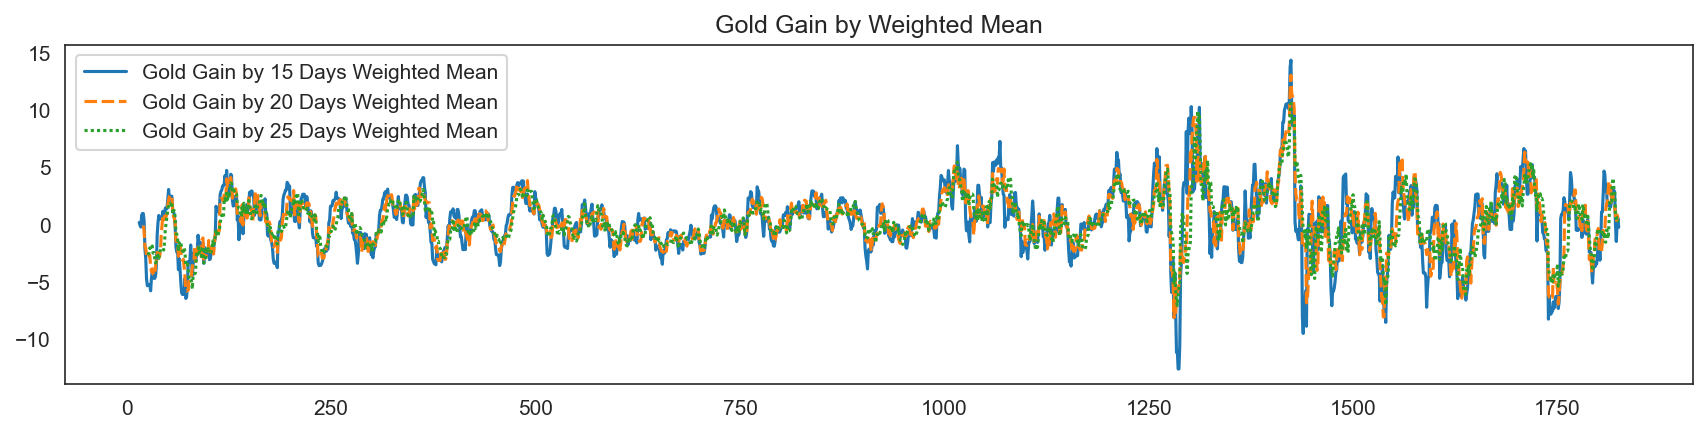

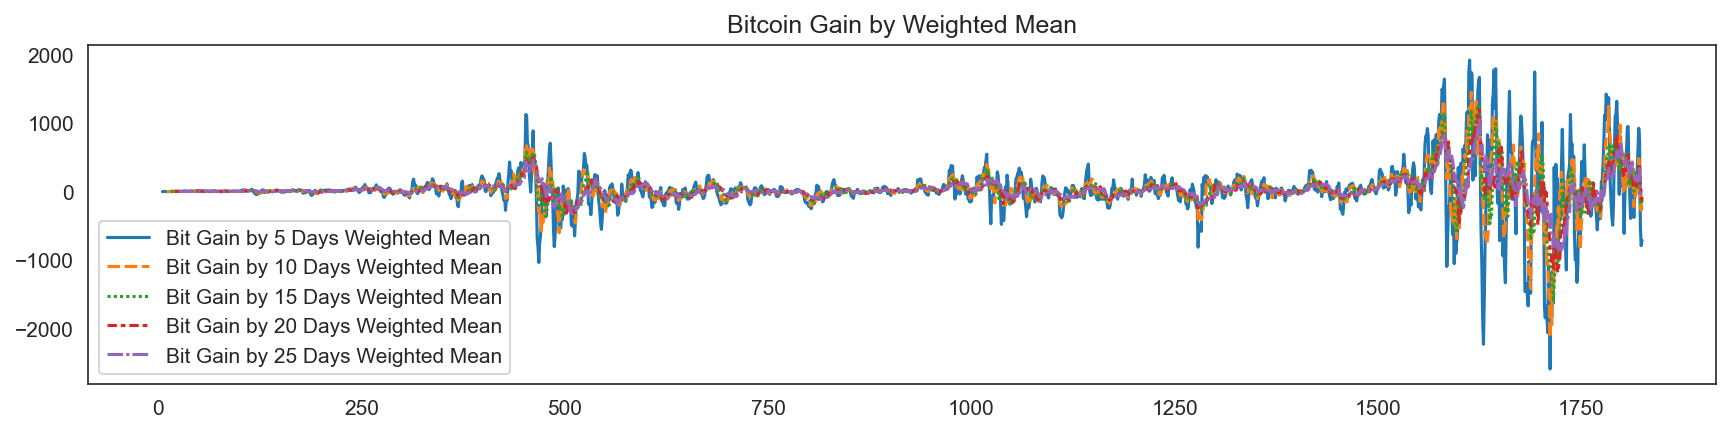

In [14]:
gain_gold_dic = {}
gain_bit_dic = {}

for i in range(15, 26, 5):
    gain_gold_dic['Gold Gain by ' + str(i) + ' Days Weighted Mean'] = df['Gold Gain'].rolling(i).mean(weight=weightedMean(i)).values
for i in range(5, 26, 5):
    gain_bit_dic['Bit Gain by ' + str(i) + ' Days Weighted Mean'] = df['Bit Gain'].rolling(i).mean(weight=weightedMean(i)).values

plt.figure(figsize=(14, 3), dpi=150)
plt.legend('best')
sns.lineplot(data=pd.DataFrame(gain_gold_dic))
plt.title('Gold Gain by Weighted Mean')
plt.savefig('results\Features\Gold Gain by Days.png')
plt.show()

plt.figure(figsize=(14, 3), dpi=150)
plt.legend('best')
sns.lineplot(data=pd.DataFrame(gain_bit_dic))
plt.title('Bitcoin Gain by Weighted Mean')
plt.savefig('results\Features\Bit Gain by Days.png')
plt.show()

In [15]:
gold_mean = df['Gold Price'].rolling(20).mean(weight=weightedMean(20)).values
df['Gold 20 Days BIAS'] = 100 * (df['Gold Price'] - gold_mean) / gold_mean
bit_mean = df['Bit Price'].rolling(5).mean(weight=weightedMean(5)).values
df['Bit 5 Days BIAS'] = 100 * (df['Bit Price'] - bit_mean) / bit_mean

In [16]:
df

,Date,Mask,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price,Gold Gain,Bit Gain,Gold 20 Days BIAS,Bit 5 Days BIAS
0,0,1,NaN,NaN,NaN,621.65,NaN,NaN,NaN,1324.60,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,609.67,NaN,NaN,NaN,1323.65,-0.95,-11.98,NaN,NaN
2,2,1,NaN,NaN,NaN,610.92,NaN,NaN,NaN,1321.75,-1.90,1.25,NaN,NaN
3,3,1,NaN,NaN,NaN,608.82,NaN,NaN,NaN,1310.80,-10.95,-2.10,NaN,NaN
4,4,1,NaN,NaN,NaN,610.38,NaN,NaN,NaN,1308.35,-2.45,1.56,NaN,-0.311618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1821,1,49963.703,50515.168,49750.105,51769.06,1822.7340,1825.5347,1816.0897,1802.15,-19.45,1821.68,0.027752,3.561508
1822,1822,1,52389.690,50168.902,50638.707,52677.40,1804.0776,1823.8490,1826.6033,1786.00,-16.15,908.34,-0.879514,3.794487
1823,1823,1,52591.844,52239.617,50342.945,46809.17,1788.1604,1805.5062,1824.9523,1788.25,2.25,-5868.23,-0.779972,-6.843100
1824,1824,1,45305.260,52467.312,52167.664,46078.38,1789.7795,1789.6935,1806.7588,1794.60,6.35,-730.79,-0.470582,-6.830069


In [17]:
b_price = df['Bit Price']
g_price = df['Gold Price']

In [18]:
scaler = MinMaxScaler(feature_range=(-1, 1))
gold_price_scaler = MinMaxScaler(feature_range=(-1, 1))
gold_price_scaler.fit_transform(df[df.columns[9]].values.reshape(-1, 1))
bit_price_scaler = MinMaxScaler(feature_range=(-1, 1))
bit_price_scaler.fit_transform(df[df.columns[5]].values.reshape(-1, 1))
df[df.columns[[5, 9, 10, 11, 12, 13]]] = scaler.fit_transform(df[df.columns[[5, 9, 10, 11, 12, 13]]])
df

,Date,Mask,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price,Gold Gain,Bit Gain,Gold 20 Days BIAS,Bit 5 Days BIAS
0,0,1,NaN,NaN,NaN,-0.999124,NaN,NaN,NaN,-0.577460,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,-0.999505,NaN,NaN,NaN,-0.579478,0.122030,0.018628,NaN,NaN
2,2,1,NaN,NaN,NaN,-0.999465,NaN,NaN,NaN,-0.583515,0.111771,0.020371,NaN,NaN
3,3,1,NaN,NaN,NaN,-0.999532,NaN,NaN,NaN,-0.606777,0.014039,0.019929,NaN,NaN
4,4,1,NaN,NaN,NaN,-0.999482,NaN,NaN,NaN,-0.611982,0.105832,0.020412,NaN,0.090712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1821,1,49963.703,50515.168,49750.105,0.625625,1822.7340,1825.5347,1816.0897,0.437039,-0.077754,0.260231,0.045283,0.215902
1822,1822,1,52389.690,50168.902,50638.707,0.654480,1804.0776,1823.8490,1826.6033,0.402730,-0.042117,0.139889,-0.069940,0.223433
1823,1823,1,52591.844,52239.617,50342.945,0.468069,1788.1604,1805.5062,1824.9523,0.407510,0.156587,-0.752992,-0.057298,-0.120403
1824,1824,1,45305.260,52467.312,52167.664,0.444855,1789.7795,1789.6935,1806.7588,0.421000,0.200864,-0.076083,-0.018005,-0.119981


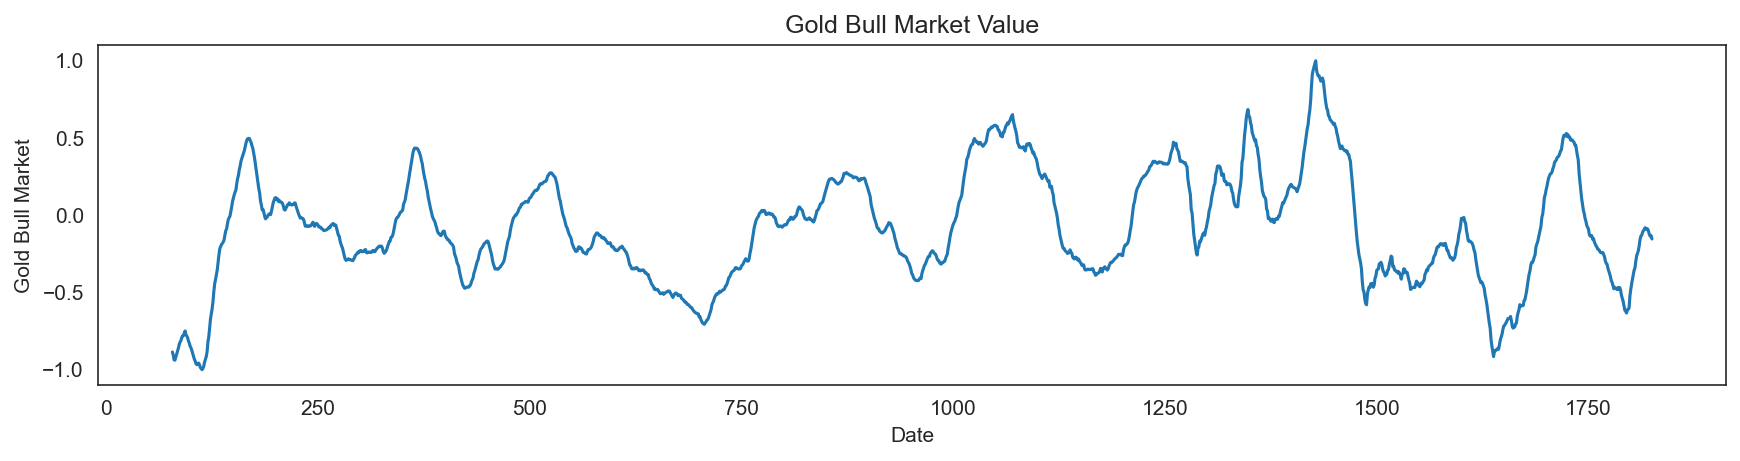

In [19]:
w = 0.42
df['Gold Bull Market'] = w * df['Gold Gain'].rolling(60).mean(weight=weightedMean(60)) + (1 - w) * df['Gold 20 Days BIAS'].rolling(60).mean(weight=weightedMean(60))
df['Gold Bull Market'] = normalize_1D(df['Gold Bull Market'].values)
plt.figure(figsize=(14, 3), dpi=150)
sns.lineplot(x = df['Date'], y = df['Gold Bull Market'])
plt.title('Gold Bull Market Value')
plt.savefig('results\Features\Gold Bull Market Value.png')
plt.show()

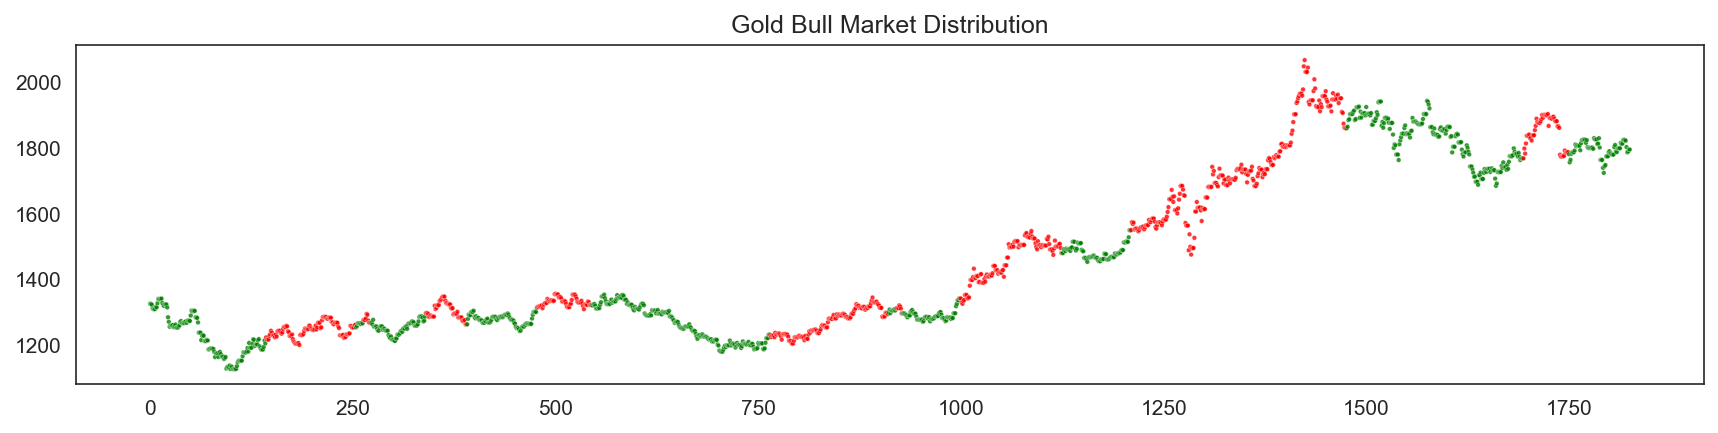

In [20]:
gold_bull = df['Gold Bull Market'] > df['Gold Bull Market'].mean()
for i in range(len(gold_bull)):
    if gold_bull[i]:
        if gold_bull[max(i - 30, 0): i + 30].sum() < 20:
            gold_bull[i] = False
for i in range(len(gold_bull)):
    if not gold_bull[i]:
        if gold_bull[max(i - 30, 0): i + 30].sum() > 40:
            gold_bull[i] = True
            
plt.figure(figsize=(14, 3), dpi=150)
sns.scatterplot(np.arange(len(df)), gold_price_scaler.inverse_transform(df['Gold Price'].values.reshape(-1, 1)).flatten(), c=gold_bull.apply(lambda x: 'r' if x else 'g'), s=5, alpha=0.8)
plt.title('Gold Bull Market Distribution')
plt.savefig('results\Features\Gold Bull Market.png')
plt.show()

In [21]:
df

,Date,Mask,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price,Gold Gain,Bit Gain,Gold 20 Days BIAS,Bit 5 Days BIAS,Gold Bull Market
0,0,1,NaN,NaN,NaN,-0.999124,NaN,NaN,NaN,-0.577460,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,-0.999505,NaN,NaN,NaN,-0.579478,0.122030,0.018628,NaN,NaN,NaN
2,2,1,NaN,NaN,NaN,-0.999465,NaN,NaN,NaN,-0.583515,0.111771,0.020371,NaN,NaN,NaN
3,3,1,NaN,NaN,NaN,-0.999532,NaN,NaN,NaN,-0.606777,0.014039,0.019929,NaN,NaN,NaN
4,4,1,NaN,NaN,NaN,-0.999482,NaN,NaN,NaN,-0.611982,0.105832,0.020412,NaN,0.090712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1821,1,49963.703,50515.168,49750.105,0.625625,1822.7340,1825.5347,1816.0897,0.437039,-0.077754,0.260231,0.045283,0.215902,-0.105108
1822,1822,1,52389.690,50168.902,50638.707,0.654480,1804.0776,1823.8490,1826.6033,0.402730,-0.042117,0.139889,-0.069940,0.223433,-0.125333
1823,1823,1,52591.844,52239.617,50342.945,0.468069,1788.1604,1805.5062,1824.9523,0.407510,0.156587,-0.752992,-0.057298,-0.120403,-0.136372
1824,1824,1,45305.260,52467.312,52167.664,0.444855,1789.7795,1789.6935,1806.7588,0.421000,0.200864,-0.076083,-0.018005,-0.119981,-0.132047


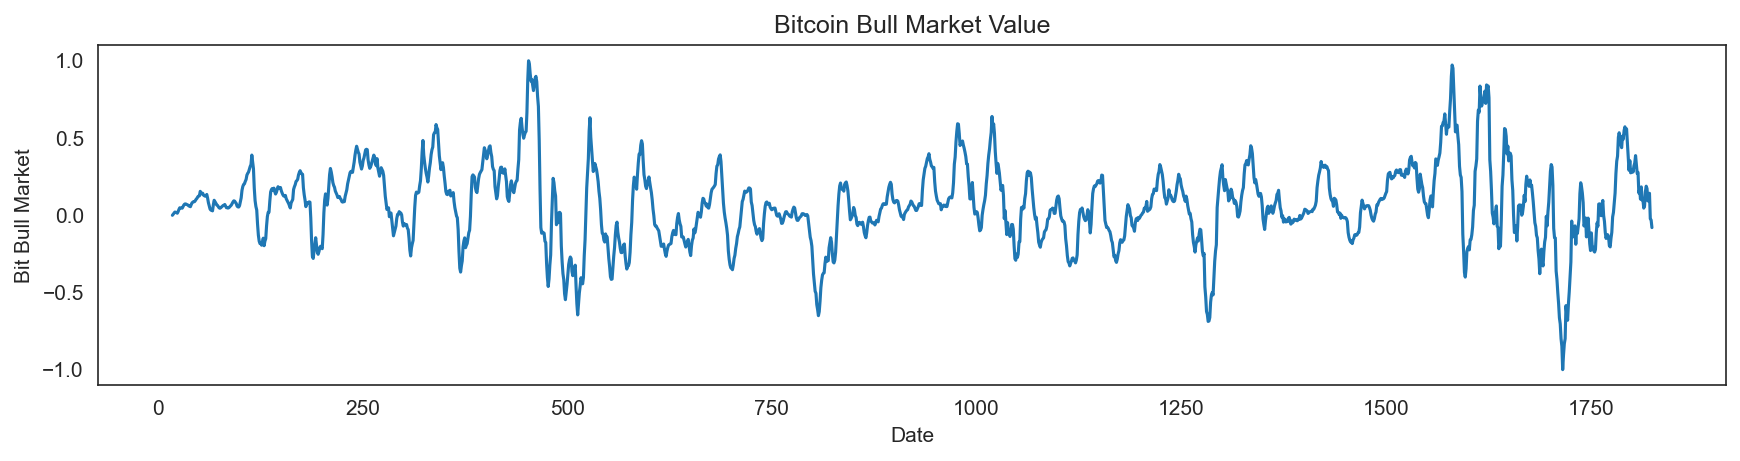

In [22]:
w = 0.42
df['Bit Bull Market'] = w * df['Bit Gain'].rolling(15).mean(weight=weightedMean(15)) + (1 - w) * df['Bit 5 Days BIAS'].rolling(15).mean(weight=weightedMean(15))
df['Bit Bull Market'] = normalize_1D(df['Bit Bull Market'].values)
plt.figure(figsize=(14, 3), dpi=150)
sns.lineplot(x = df['Date'], y = df['Bit Bull Market'])
plt.title('Bitcoin Bull Market Value')
plt.savefig('results\Features\Bit Bull Market Value.png')
plt.show()

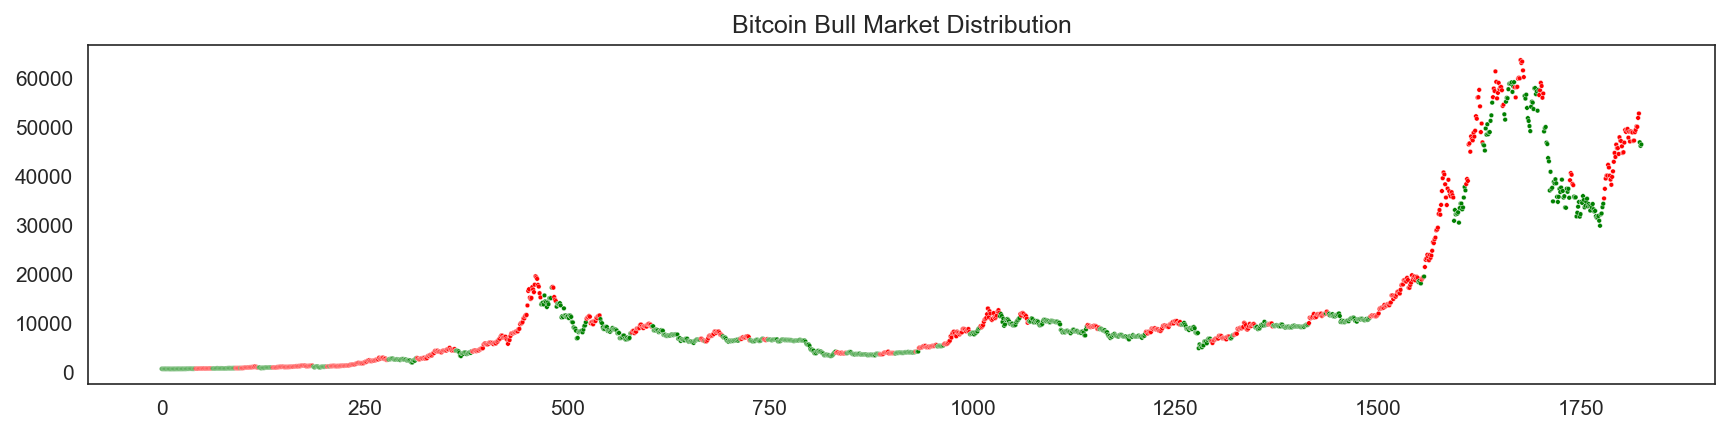

In [23]:
bit_bull = df['Bit Bull Market'] > df['Bit Bull Market'].mean()
for i in range(len(bit_bull)):
    if bit_bull[i]:
        if bit_bull[max(i - 7, 0): i + 8].sum() < 5:
            bit_bull[i] = False
for i in range(len(bit_bull)):
    if not bit_bull[i]:
        if bit_bull[max(i - 7, 0): i + 8].sum() > 10:
            bit_bull[i] = True
            
plt.figure(figsize=(14, 3), dpi=150)
sns.scatterplot(np.arange(len(df)), bit_price_scaler.inverse_transform(df['Bit Price'].values.reshape(-1, 1)).flatten(), c=bit_bull.apply(lambda x: 'r' if x else 'g'), s=5)
plt.title('Bitcoin Bull Market Distribution')
plt.savefig('results\Features\Bit Bull Market.png')
plt.show()

In [24]:
df

,Date,Mask,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price,Gold Gain,Bit Gain,Gold 20 Days BIAS,Bit 5 Days BIAS,Gold Bull Market,Bit Bull Market
0,0,1,NaN,NaN,NaN,-0.999124,NaN,NaN,NaN,-0.577460,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,-0.999505,NaN,NaN,NaN,-0.579478,0.122030,0.018628,NaN,NaN,NaN,NaN
2,2,1,NaN,NaN,NaN,-0.999465,NaN,NaN,NaN,-0.583515,0.111771,0.020371,NaN,NaN,NaN,NaN
3,3,1,NaN,NaN,NaN,-0.999532,NaN,NaN,NaN,-0.606777,0.014039,0.019929,NaN,NaN,NaN,NaN
4,4,1,NaN,NaN,NaN,-0.999482,NaN,NaN,NaN,-0.611982,0.105832,0.020412,NaN,0.090712,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1821,1,49963.703,50515.168,49750.105,0.625625,1822.7340,1825.5347,1816.0897,0.437039,-0.077754,0.260231,0.045283,0.215902,-0.105108,0.128691
1822,1822,1,52389.690,50168.902,50638.707,0.654480,1804.0776,1823.8490,1826.6033,0.402730,-0.042117,0.139889,-0.069940,0.223433,-0.125333,0.142031
1823,1823,1,52591.844,52239.617,50342.945,0.468069,1788.1604,1805.5062,1824.9523,0.407510,0.156587,-0.752992,-0.057298,-0.120403,-0.136372,-0.023378
1824,1824,1,45305.260,52467.312,52167.664,0.444855,1789.7795,1789.6935,1806.7588,0.421000,0.200864,-0.076083,-0.018005,-0.119981,-0.132047,-0.031114


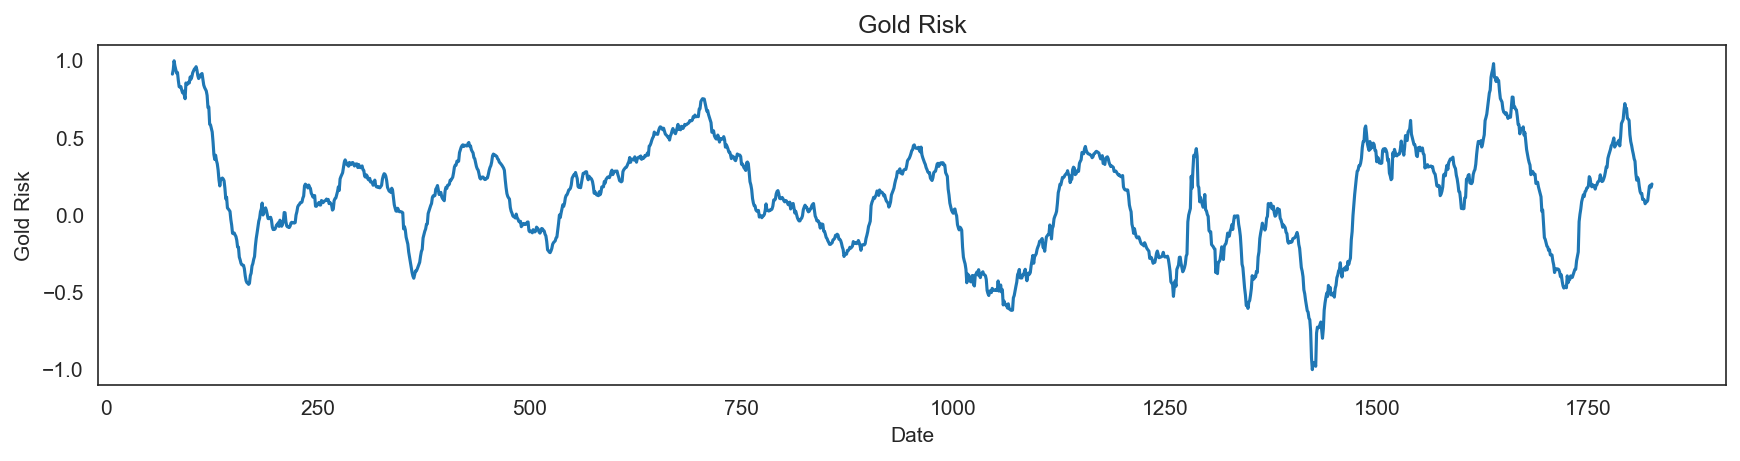

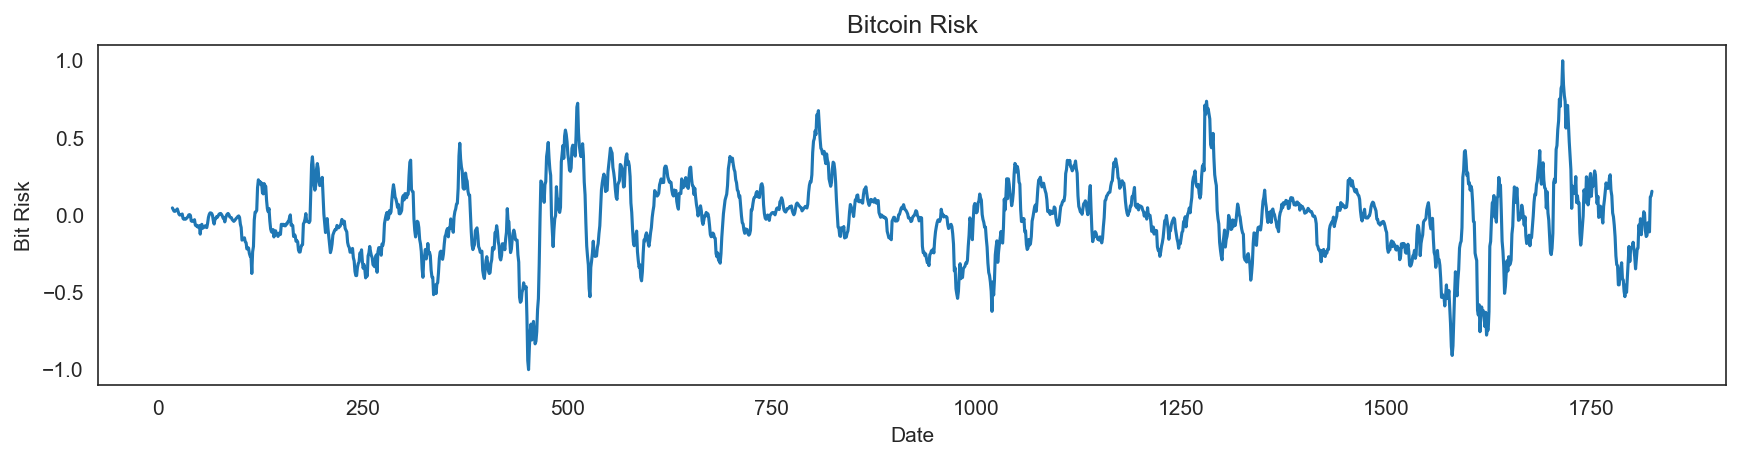

In [25]:
w = 0.8
df['Gold Risk'] = 1 - (w * df['Gold Bull Market'] + (1 - w) * df['Gold 20 Days BIAS'])
df['Gold Risk'] = normalize_1D(df['Gold Risk'].values)
df['Bit Risk'] = 1 - (w * df['Bit Bull Market'] + (1 - w) * df['Bit 5 Days BIAS'])
df['Bit Risk'] = normalize_1D(df['Bit Risk'].values)

plt.figure(figsize=(14, 3), dpi=150)
sns.lineplot(x = df['Date'], y = df['Gold Risk'])
plt.title('Gold Risk')
plt.savefig('results\Features\Gold Risk.png')
plt.show()

plt.figure(figsize=(14, 3), dpi=150)
sns.lineplot(x = df['Date'], y = df['Bit Risk'])
plt.title('Bitcoin Risk')
plt.savefig('results\Features\Bit Risk.png')
plt.show()

In [26]:
df['Org Bit Price'] = b_price
df['Org Gold Price'] = g_price

In [27]:
df['Bit ARIMA'] = pd.read_csv('input\ARIMA_pred_bit.csv')['pred']

In [28]:
g_pred = pd.read_csv('input\ARIMA_pred_gold.csv')
g_pred['Gold ARIMA'] = g_pred['pred']
g_pred.drop(columns=['Price', 'Unnamed: 0', 'pred'], inplace=True)
g_pred

,Date,Gold ARIMA
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
1260,1820,1821.597392
1261,1821,1821.329802
1262,1822,1801.359618
1263,1823,1783.685169


In [29]:
df = pd.merge(df, g_pred, how='outer')
df

,Date,Mask,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price,...,Gold 20 Days BIAS,Bit 5 Days BIAS,Gold Bull Market,Bit Bull Market,Gold Risk,Bit Risk,Org Bit Price,Org Gold Price,Bit ARIMA,Gold ARIMA
0,0,1,NaN,NaN,NaN,-0.999124,NaN,NaN,NaN,-0.577460,...,NaN,NaN,NaN,NaN,NaN,NaN,621.65,1324.60,NaN,NaN
1,1,1,NaN,NaN,NaN,-0.999505,NaN,NaN,NaN,-0.579478,...,NaN,NaN,NaN,NaN,NaN,NaN,609.67,1323.65,NaN,NaN
2,2,1,NaN,NaN,NaN,-0.999465,NaN,NaN,NaN,-0.583515,...,NaN,NaN,NaN,NaN,NaN,NaN,610.92,1321.75,NaN,NaN
3,3,1,NaN,NaN,NaN,-0.999532,NaN,NaN,NaN,-0.606777,...,NaN,NaN,NaN,NaN,NaN,NaN,608.82,1310.80,NaN,NaN
4,4,1,NaN,NaN,NaN,-0.999482,NaN,NaN,NaN,-0.611982,...,NaN,0.090712,NaN,NaN,NaN,NaN,610.38,1308.35,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1821,1,49963.703,50515.168,49750.105,0.625625,1822.7340,1825.5347,1816.0897,0.437039,...,0.045283,0.215902,-0.105108,0.128691,0.142150,-0.094190,51769.06,1802.15,50072.36646,1821.329802
1822,1822,1,52389.690,50168.902,50638.707,0.654480,1804.0776,1823.8490,1826.6033,0.402730,...,-0.069940,0.223433,-0.125333,0.142031,0.186738,-0.107890,52677.40,1786.00,51679.12840,1801.359618
1823,1823,1,52591.844,52239.617,50342.945,0.468069,1788.1604,1805.5062,1824.9523,0.407510,...,-0.057298,-0.120403,-0.136372,-0.023378,0.193904,0.118321,46809.17,1788.25,52766.34103,1783.685169
1824,1824,1,45305.260,52467.312,52167.664,0.444855,1789.7795,1789.6935,1806.7588,0.421000,...,-0.018005,-0.119981,-0.132047,-0.031114,0.181038,0.125188,46078.38,1794.60,47402.07874,1787.787001


In [30]:
df['Bit ARIMA'].fillna(method='ffill', inplace=True)
df['Gold ARIMA'].fillna(method='ffill', inplace=True)

In [31]:
df.to_csv('input/Price with Feature.csv')